In [75]:
import numpy as np
import pandas as pd 
from sklearn.metrics import auc
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

In [76]:
datafile = pd.read_csv("C:\\Users\\namil\\Downloads\\CaM01-001_CGM_Libre.csv")
time = datafile['mins'].to_numpy()
bg = datafile['BG'].to_numpy()
datafile['Date_Time'] = pd.to_datetime(datafile['Date_Time'])

1303845.0


Text(0.5, 1.0, 'overall blood glucose of subject 0002')

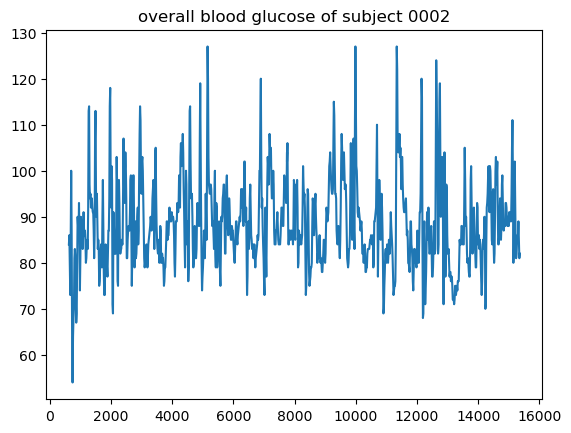

In [77]:
time = time[~np.isnan(time)]
bg = bg[~np.isnan(bg)]
area = auc(time, bg)
print(area)
plt.plot(time,bg)
plt.title('overall blood glucose of subject 0002')

In [78]:
tuples = zip(time,bg)
arr = np.asarray(list(tuples))

# #pick a time interval
# filtered = arr[arr[:,0] <= 660]
# plt.plot(filtered[:,0], filtered[:,1], label = "libre bg")
# plt.legend()

# #calculate iauc for that time interval
# area = auc(filtered[:,0], filtered[:,1])
# print(area)

In [79]:
#filter by start time and interval length
#timestring = '9/19/2021 2:00:00 PM'
timestring = '9/18/2021 11:21:00 AM'
target_time = datetime.strptime(timestring, '%m/%d/%Y %I:%M:%S %p')
theday = datafile[datafile['Date_Time'].dt.date == target_time.date()]
starttime = theday.iloc[0]['Date_Time']
startmins = theday.iloc[0]['mins']
minutes = int((target_time - starttime).total_seconds() / 60 + startmins)
print(minutes)

681


7725.0


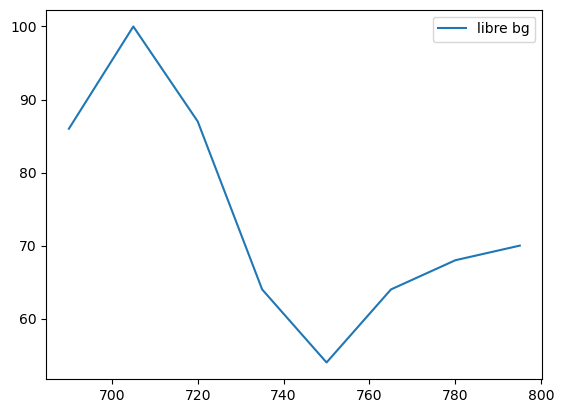

In [80]:
timeframe = 120
#filter to time interval
filtered = arr[arr[:,0] >= minutes]
filtered = filtered[filtered[:,0] <= minutes + timeframe]
plt.plot(filtered[:,0], filtered[:,1], label = "libre bg")
plt.legend()

#calculate iauc for that time interval
area = auc(filtered[:,0], filtered[:,1])
print(area)